In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I flew to LHR from ATH in C...
1,✅ Trip Verified | I like the British Airways ...
2,✅ Trip Verified | I have come to boarding and...
3,✅ Trip Verified | Stinking nappies being chang...
4,✅ Trip Verified | Worst service ever. Lost bag...


In [4]:
df.to_csv("BA_reviews.csv")

 Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
df.tail()

,reviews
995,✅ Trip Verified | London to Chicago. Could it...
996,✅ Trip Verified | Prague to London Heathrow. ...
997,✅ Trip Verified | London City to Florence. My...
998,✅ Trip Verified | London to Johannesburg. Sin...
999,✅ Trip Verified | Doha to London Heathrow. Fl...


In [7]:
df

,reviews
0,✅ Trip Verified | I flew to LHR from ATH in C...
1,✅ Trip Verified | I like the British Airways ...
2,✅ Trip Verified | I have come to boarding and...
3,✅ Trip Verified | Stinking nappies being chang...
4,✅ Trip Verified | Worst service ever. Lost bag...
...,...
995,✅ Trip Verified | London to Chicago. Could it...
996,✅ Trip Verified | Prague to London Heathrow. ...
997,✅ Trip Verified | London City to Florence. My...
998,✅ Trip Verified | London to Johannesburg. Sin...


In [8]:
print(df.isnull().sum())

reviews    0
dtype: int64


In [9]:
df['reviews'] = df['reviews'].str.lower()

In [10]:
df.head()

,reviews
0,✅ trip verified | i flew to lhr from ath in c...
1,✅ trip verified | i like the british airways ...
2,✅ trip verified | i have come to boarding and...
3,✅ trip verified | stinking nappies being chang...
4,✅ trip verified | worst service ever. lost bag...


In [11]:
df['reviews'] = df['reviews'].str.replace('[^a-zA-Z\s]', '')

C:\Users\Dell\AppData\Local\Temp\ipykernel_16264\2161802185.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^a-zA-Z\s]', '')


In [12]:
df['reviews']

0       trip verified   i flew to lhr from ath in clu...
1       trip verified   i like the british airways wo...
2       trip verified   i have come to boarding and m...
3       trip verified  stinking nappies being changed...
4       trip verified  worst service ever lost baggag...
                             ...                        
995     trip verified   london to chicago could it ge...
996     trip verified   prague to london heathrow ver...
997     trip verified   london city to florence my fl...
998     trip verified   london to johannesburg since ...
999     trip verified   doha to london heathrow fligh...
Name: reviews, Length: 1000, dtype: object

In [13]:
df['reviews'] = df['reviews'].str.replace('trip verified', '', case=False)

In [14]:
df.head()

,reviews
0,i flew to lhr from ath in club europe with...
1,i like the british airways world traveller...
2,i have come to boarding and my cabin lugga...
3,stinking nappies being changed in business ...
4,worst service ever lost baggage because of ...


In [15]:
# pip install textblob

In [16]:
from textblob import TextBlob

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [17]:
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    # Classify the polarity as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each review
df['sentiment'] = df['reviews'].apply(get_sentiment_polarity)

# Display the distribution of sentiments
print(df['sentiment'].value_counts())

# Save the updated dataset with sentiment information
df.to_csv('sentiment_analysis_result.csv', index=False)

positive    633
negative    357
neutral      10
Name: sentiment, dtype: int64


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import numpy as np

# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['reviews'])

# Apply Latent Dirichlet Allocation (LDA) model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Get dominant topic for each review
topic_probabilities = lda.transform(X)
df['topic'] = np.argmax(topic_probabilities, axis=1)

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each review
df['sentiment_polarity'] = df['reviews'].apply(get_sentiment_polarity)

# Assign sentiment labels
df['sentiment'] = df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the distribution of sentiments
print(df['sentiment'].value_counts())

# Save the updated dataset with dominant topics and sentiments
df.to_csv('dataset_with_topics_and_sentiments.csv', index=False)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_keywords)}")

positive    633
negative    357
neutral      10
Name: sentiment, dtype: int64
Topic #1: ba, flight, customer, service, refund, booked, told, phone, just, booking
Topic #2: flight, british, airways, london, hours, told, cancelled, delayed, ticket, did
Topic #3: class, business, ba, seats, seat, flight, economy, service, cabin, airways
Topic #4: flight, good, food, ba, crew, service, time, cabin, seat, club
Topic #5: flight, ba, heathrow, hours, hour, staff, london, time, plane, airport


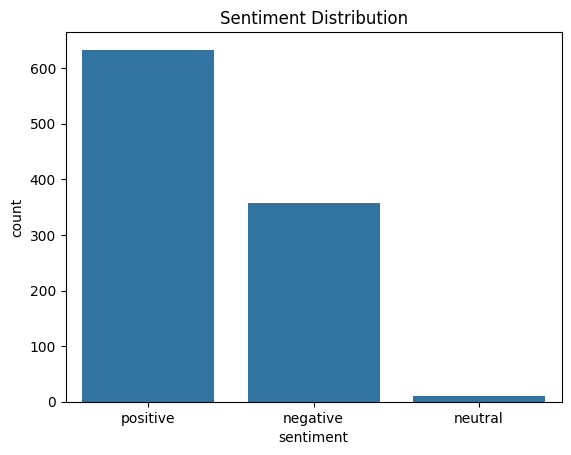

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_16264\1022001046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')


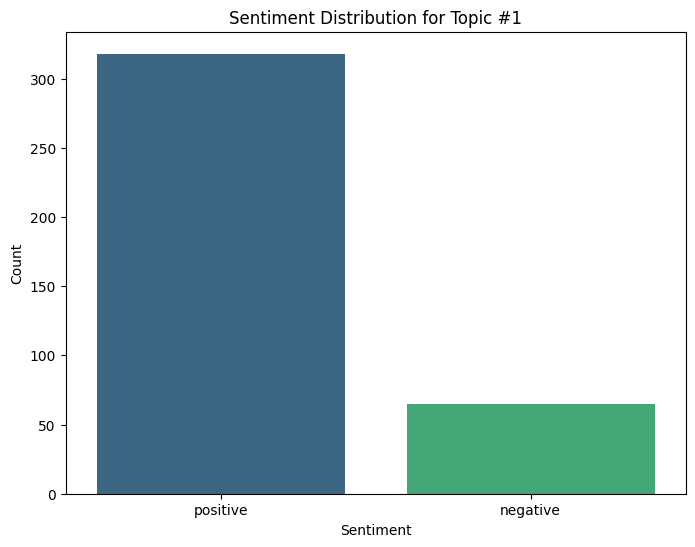

C:\Users\Dell\AppData\Local\Temp\ipykernel_16264\1022001046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')


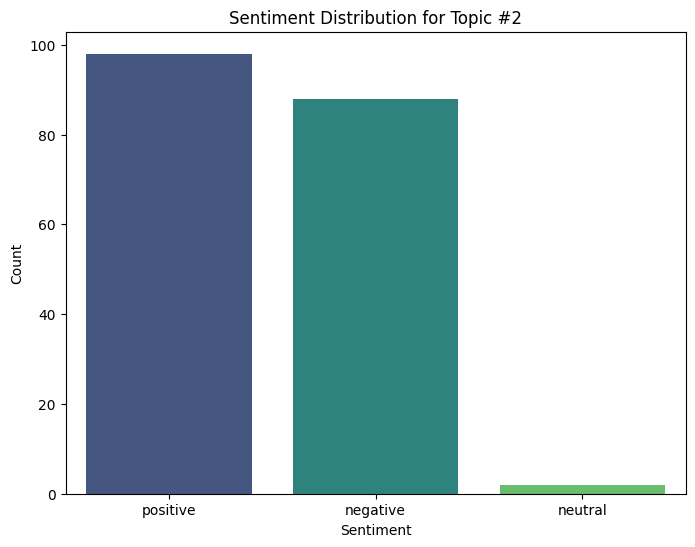

C:\Users\Dell\AppData\Local\Temp\ipykernel_16264\1022001046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')


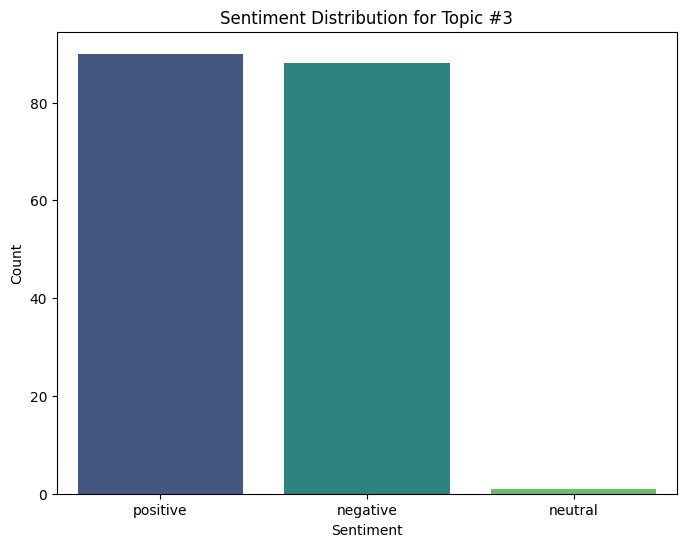

C:\Users\Dell\AppData\Local\Temp\ipykernel_16264\1022001046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')


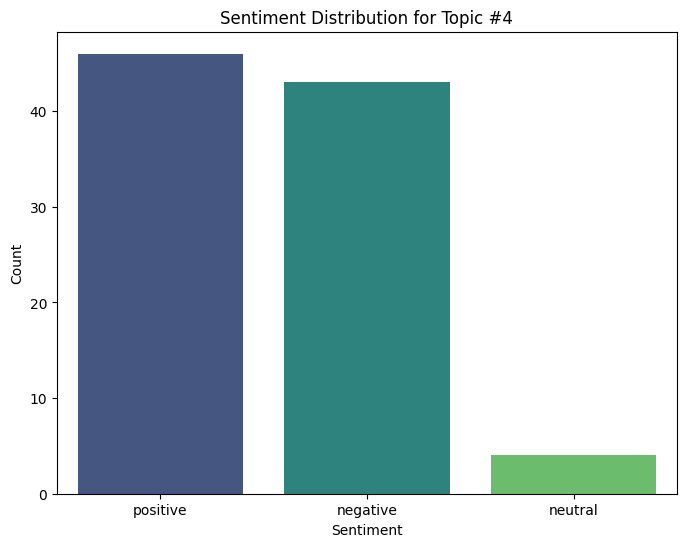

C:\Users\Dell\AppData\Local\Temp\ipykernel_16264\1022001046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')


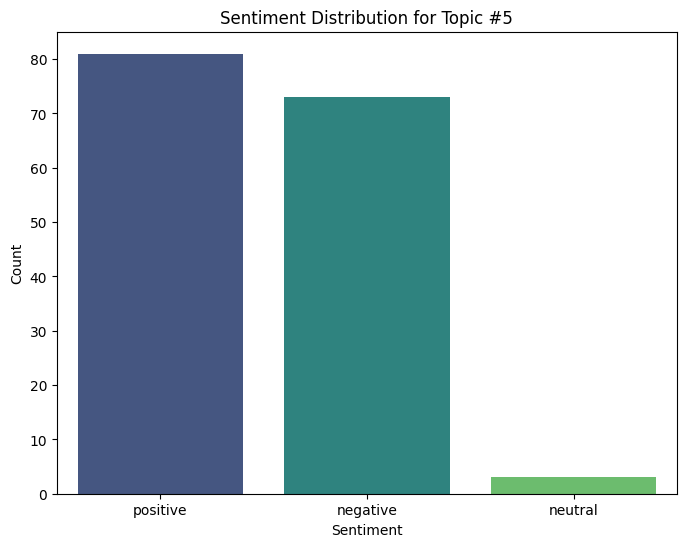

In [22]:
for topic_idx, topic in enumerate(df['topic'].unique()):
    topic_df = df[df['topic'] == topic]
    sentiment_distribution = topic_df['sentiment'].value_counts()
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')
    plt.title(f'Sentiment Distribution for Topic #{topic_idx + 1}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# pip install wordcloud

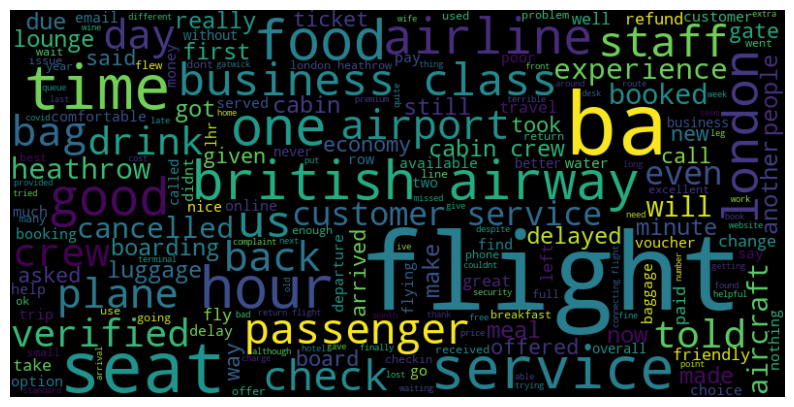

In [23]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(df['reviews']))

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
# Assuming you have loaded your dataset with the assigned sentiments and topics
df = pd.read_csv('dataset_with_topics_and_sentiments.csv')

# Select rows with neutral sentiment
neutral_reviews = df[df['sentiment'] == 'neutral']

# Display or further analyze the neutral reviews
print(neutral_reviews)

                                               reviews sentiment  topic  \
117      in june my flight was cancelled within thr...   neutral      1   
149  not verified  ba is not treating its premium e...   neutral      2   
155      came from glasgow to london and took conne...   neutral      1   
328     beyond disgusted with the fact that my bagg...   neutral      0   
397  not verified   the flight was delayed over  ho...   neutral      1   
487      for once more ba got it all wrong with  ho...   neutral      4   
660      johannesburg to dublin via london i get to...   neutral      4   
676     i purchased roundtrip tickets for my wife a...   neutral      0   
809      gatwick to seville when my son and his gir...   neutral      1   
981      san francisco to london after paying  for ...   neutral      0   

     sentiment_polarity  
117                 0.0  
149                 0.0  
155                 0.0  
328                 0.0  
397                 0.0  
487               

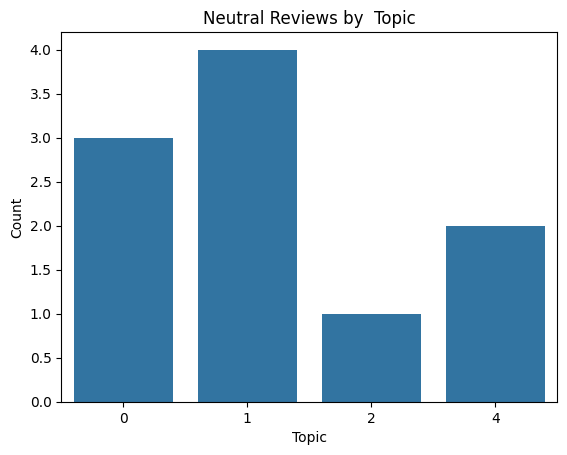

In [27]:
sns.countplot(x='topic', data=neutral_reviews)
plt.title('Neutral Reviews by  Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()